In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

import seaborn as sns

In [2]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df[['BMI', 'BloodPressure', 'Glucose']] = df[['BMI', 'BloodPressure', 'Glucose']].replace(0, np.NaN)
df.fillna(df.mean(), inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

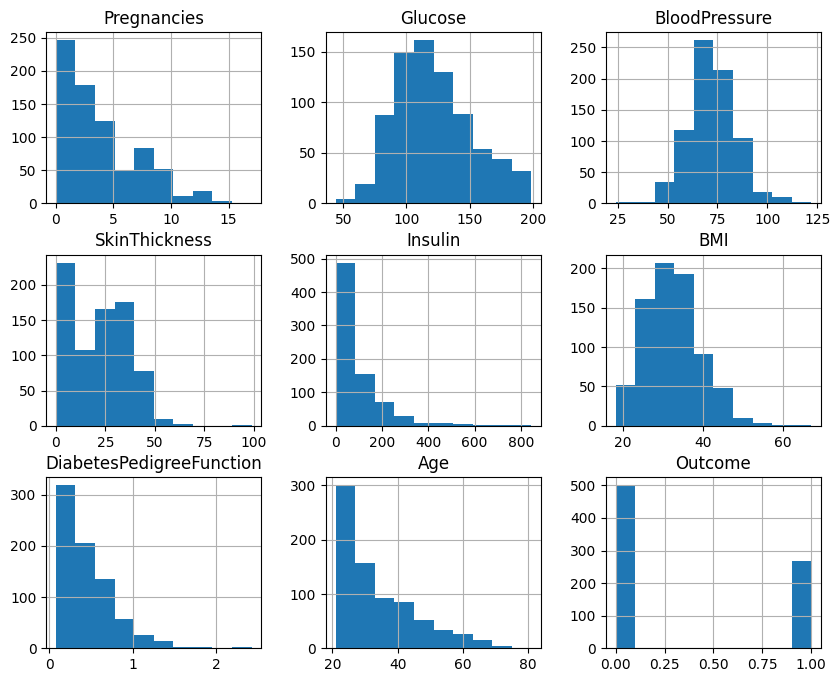

In [5]:
df.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

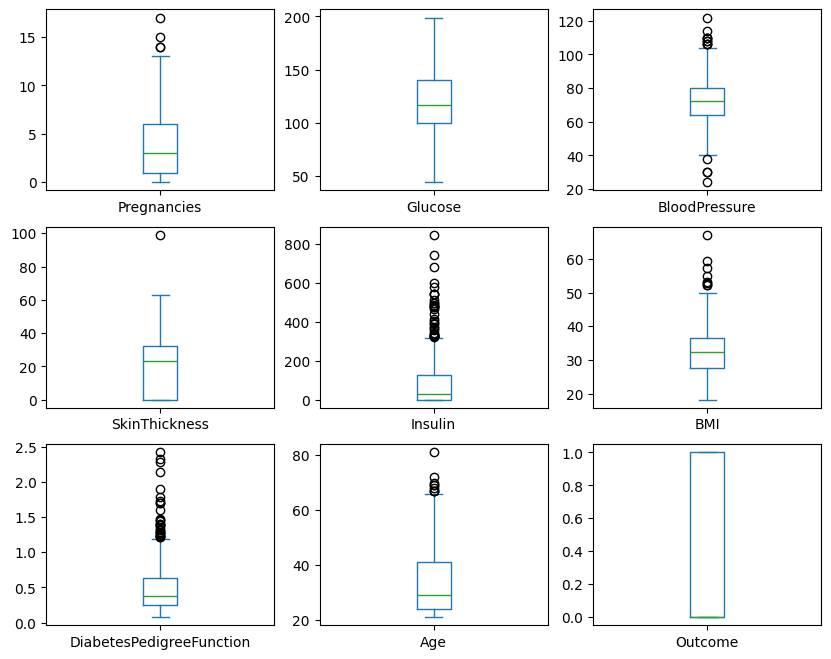

In [6]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [7]:
X = df.drop(['Outcome', 'SkinThickness', 'DiabetesPedigreeFunction' ], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
0,6,148.0,72.0,0,33.6,50
1,1,85.0,66.0,0,26.6,31
2,8,183.0,64.0,0,23.3,32
3,1,89.0,66.0,94,28.1,21
4,0,137.0,40.0,168,43.1,33


<Axes: >

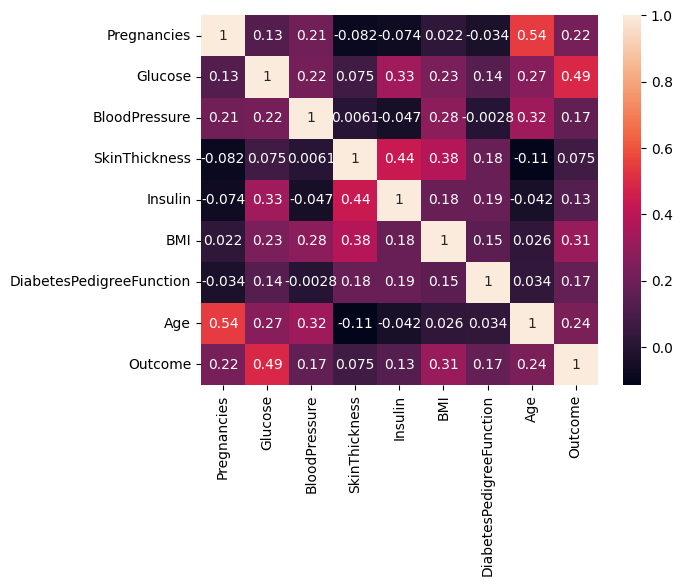

In [8]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True)

In [9]:
y= df['Outcome']
y_cat = to_categorical(y)
y_cat[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [10]:
Xn = normalize(X, norm='l1', axis=0)
Xn[:5]

array([[0.00203183, 0.00158364, 0.0012948 , 0.        , 0.00134792,
        0.00195856],
       [0.00033864, 0.00090952, 0.0011869 , 0.        , 0.0010671 ,
        0.00121431],
       [0.00270911, 0.00195815, 0.00115093, 0.        , 0.00093472,
        0.00125348],
       [0.00033864, 0.00095233, 0.0011869 , 0.00153379, 0.00112728,
        0.00082259],
       [0.        , 0.00146594, 0.00071933, 0.00274125, 0.00172903,
        0.00129265]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y_cat,test_size=0.2, random_state=22)

In [13]:
Adam?

Init signature:
Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name='adam',
    **kwargs,
)
Docstring:     
Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.

According to
[Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
the method is "*computationally
efficient, has little memory requirement, invariant to diagonal rescaling of
gradients, and is well suited for problems that are large in terms of
data/parameters*".

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to
        use. The learning rate. Def

In [14]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(learning_rate=0.03), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000


2024-03-24 06:46:59.232999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5921 - loss: 0.6681
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6499 - loss: 0.6518
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6396 - loss: 0.6559
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6644 - loss: 0.6380
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6535 - loss: 0.6466
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6683 - loss: 0.6422
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6625 - loss: 0.6418
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6472 - loss: 0.6536
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6490 - loss: 0.6489
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6669 - loss: 0.6373
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6527 - loss: 0.6461
Epoch 12/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

614/614 [==============================] - 0s 37us/step - loss: 0.4962 - acc: 0.7476
Epoch 494/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5023 - acc: 0.7476
Epoch 495/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4960 - acc: 0.7590
Epoch 496/1000
614/614 [==============================] - 0s 49us/step - loss: 0.4916 - acc: 0.7638
Epoch 497/1000
614/614 [==============================] - 0s 35us/step - loss: 0.4891 - acc: 0.7622
Epoch 498/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4932 - acc: 0.7557
Epoch 499/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5011 - acc: 0.7394
Epoch 500/1000
614/614 [==============================] - 0s 48us/step - loss: 0.4936 - acc: 0.7573
Epoch 501/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4907 - acc: 0.7557
Epoch 502/1000
614/614 [==============================] - 0s 44us/step - loss: 0.5027 - acc: 0.7524
Epoch 503/1000


614/614 [==============================] - 0s 40us/step - loss: 0.4778 - acc: 0.7720
Epoch 576/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4803 - acc: 0.7671
Epoch 577/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4809 - acc: 0.7671
Epoch 578/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4840 - acc: 0.7606
Epoch 579/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4901 - acc: 0.7573
Epoch 580/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4968 - acc: 0.7378
Epoch 581/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4837 - acc: 0.7606
Epoch 582/1000
614/614 [==============================] - 0s 38us/step - loss: 0.5005 - acc: 0.7394
Epoch 583/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4869 - acc: 0.7492
Epoch 584/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4841 - acc: 0.7655
Epoch 585/1000


614/614 [==============================] - 0s 40us/step - loss: 0.4721 - acc: 0.7671
Epoch 658/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4806 - acc: 0.7687
Epoch 659/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4776 - acc: 0.7573
Epoch 660/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4985 - acc: 0.7769
Epoch 661/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4885 - acc: 0.7638
Epoch 662/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4872 - acc: 0.7524
Epoch 663/1000
614/614 [==============================] - 0s 43us/step - loss: 0.4814 - acc: 0.7573
Epoch 664/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4794 - acc: 0.7687
Epoch 665/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4797 - acc: 0.7687
Epoch 666/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4794 - acc: 0.7671
Epoch 667/1000


614/614 [==============================] - 0s 39us/step - loss: 0.4781 - acc: 0.7736
Epoch 740/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4801 - acc: 0.7590
Epoch 741/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4824 - acc: 0.7541
Epoch 742/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4779 - acc: 0.7655
Epoch 743/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4740 - acc: 0.7704
Epoch 744/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4953 - acc: 0.7590
Epoch 745/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4684 - acc: 0.7769
Epoch 746/1000
614/614 [==============================] - 0s 52us/step - loss: 0.4719 - acc: 0.7671
Epoch 747/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4970 - acc: 0.7687
Epoch 748/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4792 - acc: 0.7687
Epoch 749/1000


614/614 [==============================] - 0s 45us/step - loss: 0.4744 - acc: 0.7736
Epoch 822/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4696 - acc: 0.7687
Epoch 823/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4724 - acc: 0.7801
Epoch 824/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4972 - acc: 0.7443
Epoch 825/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4727 - acc: 0.7704
Epoch 826/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4722 - acc: 0.7671
Epoch 827/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4686 - acc: 0.7671
Epoch 828/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4812 - acc: 0.7736
Epoch 829/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4736 - acc: 0.7720
Epoch 830/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4939 - acc: 0.7541
Epoch 831/1000


614/614 [==============================] - 0s 42us/step - loss: 0.4733 - acc: 0.7687
Epoch 904/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4700 - acc: 0.7704
Epoch 905/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4738 - acc: 0.7736
Epoch 906/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4721 - acc: 0.7671
Epoch 907/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4860 - acc: 0.7606
Epoch 908/1000
614/614 [==============================] - 0s 40us/step - loss: 0.4777 - acc: 0.7866
Epoch 909/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4933 - acc: 0.7476
Epoch 910/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4706 - acc: 0.7671
Epoch 911/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4677 - acc: 0.7801
Epoch 912/1000
614/614 [==============================] - 0s 41us/step - loss: 0.5073 - acc: 0.7671
Epoch 913/1000


614/614 [==============================] - 0s 45us/step - loss: 0.4641 - acc: 0.7801
Epoch 986/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4687 - acc: 0.7704
Epoch 987/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4662 - acc: 0.7720
Epoch 988/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4768 - acc: 0.7785
Epoch 989/1000
614/614 [==============================] - 0s 34us/step - loss: 0.4689 - acc: 0.7769
Epoch 990/1000
614/614 [==============================] - 0s 53us/step - loss: 0.4677 - acc: 0.7752
Epoch 991/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4671 - acc: 0.7736
Epoch 992/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4677 - acc: 0.7720
Epoch 993/1000
614/614 [==============================] - 0s 42us/step - loss: 0.4744 - acc: 0.7655
Epoch 994/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4760 - acc: 0.7687
Epoch 995/1000


In [15]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [16]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.69      0.41      0.51        54

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.71       154



In [17]:
cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm)

,0,1
0,90,10
1,32,22


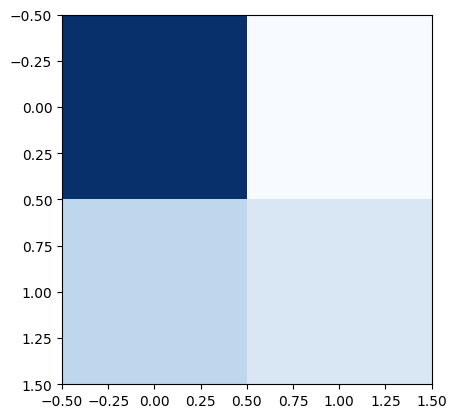

In [18]:
plt.imshow(cm, cmap='Blues')